In [11]:
import gdown

url = 'https://drive.google.com/file/d/1Dh3ejE9GNg8jMBSaAF6Vx7q_79fGaBDZ/view?usp=sharing'
output = '/content/final_cited_by_years_type_cat.csv'
gdown.download(url=url, output=output, quiet=False, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1Dh3ejE9GNg8jMBSaAF6Vx7q_79fGaBDZ
To: /content/final_cited_by_years_type_cat.csv
100%|██████████| 426M/426M [00:05<00:00, 74.6MB/s]


'/content/final_cited_by_years_type_cat.csv'

In [12]:
import pandas as pd

df = pd.read_csv('final_cited_by_years_type_cat.csv')

In [13]:
df

,article_id_openalex,date_citation_counts,first_publication_date,journal_publication_date,article_type,categories
0,https://openalex.org/W100001730,"{'2004-12-21': 1, '2004-12-23': 1, '2005-08-21...",2004-04-01,2004-01-01,journal-article,cond-mat.supr-con cond-mat.str-el
1,https://openalex.org/W100014870,"{'1996-02-21': 1, '1997-01-11': 1, '1997-01-14...",1996-04-01,1996-07-01,journal-article,q-alg math.QA
2,https://openalex.org/W1000585164,"{'2015-10-22': 1, '2016-09-28': 1, '2016-10-21...",2015-07-24,2016-02-16,journal-article,hep-ph
3,https://openalex.org/W1000603767,"{'2011-06-11': 1, '2013-05-08': 1, '2013-10-24...",2012-09-24,2013-02-13,journal-article,quant-ph
4,https://openalex.org/W1000951278,"{'2012-10-25': 1, '2013-11-08': 1}",2012-03-20,2012-03-20,journal-article,stat.ME
...,...,...,...,...,...,...
895922,https://openalex.org/W997665189,{'2016-03-17': 1},2015-07-17,2016-05-20,journal-article,hep-ph astro-ph.HE
895923,https://openalex.org/W998121512,"{'2015-05-29': 1, '2015-09-11': 1, '2016-04-04...",2015-07-23,2015-07-23,journal-article,astro-ph.SR astro-ph.EP
895924,https://openalex.org/W99824525,"{'2004-10-12': 1, '2004-12-25': 1, '2006-07-25...",2003-09-15,2004-06-22,journal-article,cond-mat.str-el
895925,https://openalex.org/W998383075,"{'2015-05-28': 1, '2016-02-08': 1, '2017-04-12...",2013-11-28,2015-07-09,journal-article,astro-ph.HE astro-ph.CO


In [14]:
df['categories'].value_counts()

astro-ph                                              61763
hep-ph                                                48819
hep-th                                                39882
quant-ph                                              32795
cond-mat.mes-hall                                     23858
                                                      ...  
stat.ML cs.IT cs.NA math.IT math.SP physics.med-ph        1
cs.DB cs.AI cs.IR cs.SI                                   1
cs.SI cs.IR cs.LG physics.soc-ph                          1
stat.AP q-bio.NC stat.CO stat.ML                          1
math.AT math.CT math.RT                                   1
Name: categories, Length: 34023, dtype: int64

#Evaluations

First, lets compare the average number of citations between the first publication to the jornal publication date compared to the average number of citations after the jornal publication date

In [58]:
df_copy = df.copy()

In [49]:
# df_copy = df_copy.iloc[0:100000]

In [22]:
type(df_copy['date_citation_counts'])

pandas.core.series.Series

In [23]:
df_copy['date_citation_counts']

0      {'2004-12-21': 1, '2004-12-23': 1, '2005-08-21...
1      {'1996-02-21': 1, '1997-01-11': 1, '1997-01-14...
2      {'2015-10-22': 1, '2016-09-28': 1, '2016-10-21...
3      {'2011-06-11': 1, '2013-05-08': 1, '2013-10-24...
4                     {'2012-10-25': 1, '2013-11-08': 1}
                             ...                        
495    {'2012-05-30': 1, '2012-10-01': 1, '2013-06-20...
496    {'2004-02-11': 1, '2004-04-21': 1, '2004-04-25...
497                                    {'2018-02-01': 1}
498    {'2017-04-19': 1, '2019-02-13': 1, '2020-01-17...
499    {'1998-01-20': 1, '1998-09-23': 1, '1999-04-16...
Name: date_citation_counts, Length: 500, dtype: object

convert the srt dict to python dict, and the different dtes to datetime objects

In [59]:
import ast
from tqdm import tqdm
tqdm.pandas()

# Conversion of string representation of dictionary to dictionary
df_copy['date_citation_counts'] = df_copy['date_citation_counts'].progress_apply(ast.literal_eval)

# Conversion of string to datetime
df_copy['first_publication_date'] = pd.to_datetime(df_copy['first_publication_date'])
df_copy['journal_publication_date'] = pd.to_datetime(df_copy['journal_publication_date'])

100%|██████████| 895927/895927 [01:48<00:00, 8285.24it/s] 


100%|██████████| 895927/895927 [10:22<00:00, 1439.11it/s]


<Figure size 1000x600 with 0 Axes>

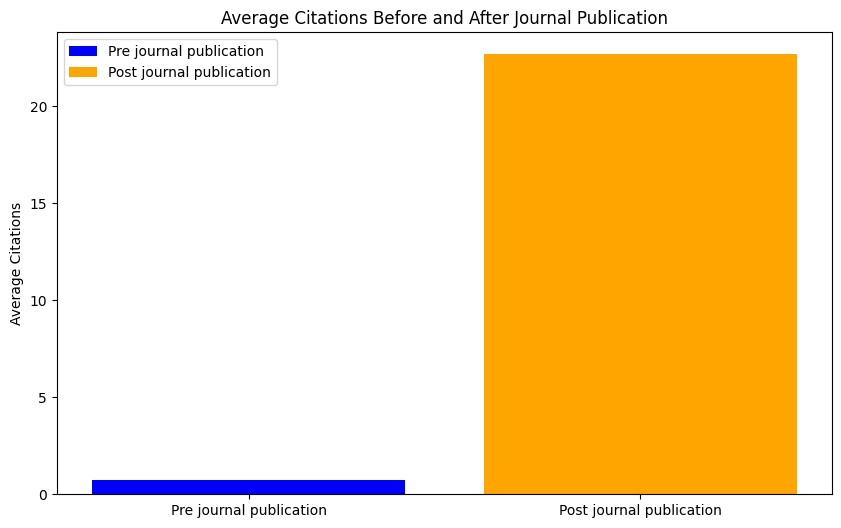

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import ast
import numpy as np
from tqdm import tqdm
tqdm.pandas()

# # Conversion of string representation of dictionary to dictionary
# df_copy['date_citation_counts'] = df_copy['date_citation_counts'].apply(ast.literal_eval)

# # Conversion of string to datetime
# df_copy['first_publication_date'] = pd.to_datetime(df_copy['first_publication_date'])
# df_copy['journal_publication_date'] = pd.to_datetime(df_copy['journal_publication_date'])

# Function to compute average citations before and after journal publication
def compute_avg_citations(row):
    date_citations = {datetime.strptime(date, "%Y-%m-%d"): count for date, count in row['date_citation_counts'].items()}
    pre_journal_citations = [count for date, count in date_citations.items() if date <= row['journal_publication_date']]
    post_journal_citations = [count for date, count in date_citations.items() if date > row['journal_publication_date']]

    sum_pre_journal_citation = sum(pre_journal_citations) #/ len(pre_journal_citations) if pre_journal_citations else 0
    sum_post_journal_citation = sum(post_journal_citations) #/ len(post_journal_citations) if post_journal_citations else 0

    return pd.Series([sum_pre_journal_citation, sum_post_journal_citation])

# Apply the function to the DataFrame
df_copy[['sum_pre_journal_citation', 'sum_post_journal_citation']] = df_copy.progress_apply(compute_avg_citations, axis=1)

# Compute overall averages
overall_avg_pre_journal_citation = np.mean(df_copy['sum_pre_journal_citation'])
overall_avg_post_journal_citation = np.mean(df_copy['sum_post_journal_citation'])

# Now let's plot it
plt.figure(figsize=(10, 6))

# Now let's plot it
plt.figure(figsize=(10, 6))

# Plot each bar individually, assign different colors and labels for the legend
plt.bar('Pre journal publication', overall_avg_pre_journal_citation, color='blue', label='Pre journal publication')
plt.bar('Post journal publication', overall_avg_post_journal_citation, color='orange', label='Post journal publication')

plt.title('Average Citations Before and After Journal Publication')
plt.ylabel('Average Citations')

# Add a legend
plt.legend()

plt.show()


In [62]:
print(f"overall_avg_pre_journal_citation: {overall_avg_pre_journal_citation}")
print(f"overall_avg_post_journal_citation: {overall_avg_post_journal_citation}")

overall_avg_pre_journal_citation: 0.7252532851448834
overall_avg_post_journal_citation: 22.684194136352627


Now the mean can be less informative if we have too many outlayers so we will also plot the median

<Figure size 1000x600 with 0 Axes>

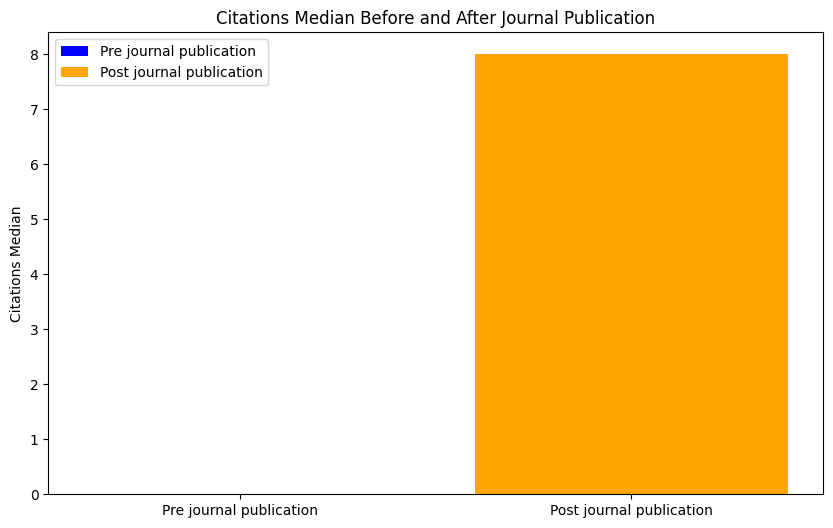

In [61]:
# Compute overall averages
overall_median_pre_journal_citation = np.median(df_copy['sum_pre_journal_citation'])
overall_median_post_journal_citation = np.median(df_copy['sum_post_journal_citation'])

# Now let's plot it
plt.figure(figsize=(10, 6))

# Now let's plot it
plt.figure(figsize=(10, 6))

# Plot each bar individually, assign different colors and labels for the legend
plt.bar('Pre journal publication', overall_median_pre_journal_citation, color='blue', label='Pre journal publication')
plt.bar('Post journal publication', overall_median_post_journal_citation, color='orange', label='Post journal publication')

plt.title('Citations Median Before and After Journal Publication')
plt.ylabel('Citations Median')

# Add a legend
plt.legend()

In [63]:
print(f"overall_median_pre_journal_citation: {overall_median_pre_journal_citation}")
print(f"overall_median_post_journal_citation: {overall_median_post_journal_citation}")

overall_median_pre_journal_citation: 0.0
overall_median_post_journal_citation: 8.0
